In [45]:
import numpy as np 
import pandas as pd
import os

#### df.melt(...)

#### df.pivot(...)

In [46]:
scoring=pd.read_csv("scoring_2.csv").filter(regex="^(?!(Unname)).*")
team_splits=pd.read_csv("team_splits_2.csv").filter(regex="^(?!(Unname)).*")

In [47]:
scoring.head()

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0


In [48]:
team_splits.head()

,year,tmID,SepW,SepL,SepT,SepOL,OctW,OctL,OctT,OctOL,...,FebOL,MarW,MarL,MarT,MarOL,AprW,AprL,AprT,AprOL,name
0,1980,BOS,NaN,NaN,NaN,NaN,2.0,7.0,1.0,NaN,...,NaN,8.0,4.0,3.0,NaN,1.0,2.0,0.0,NaN,Boston Bruins
1,1980,BUF,NaN,NaN,NaN,NaN,5.0,2.0,2.0,NaN,...,NaN,8.0,6.0,1.0,NaN,1.0,1.0,1.0,NaN,Buffalo Sabres
2,1980,CAL,NaN,NaN,NaN,NaN,5.0,4.0,2.0,NaN,...,NaN,6.0,6.0,2.0,NaN,2.0,0.0,0.0,NaN,Calgary Flames
3,1980,CHI,NaN,NaN,NaN,NaN,6.0,4.0,2.0,NaN,...,NaN,4.0,5.0,4.0,NaN,1.0,1.0,1.0,NaN,Chicago Black Hawks
4,1980,COR,NaN,NaN,NaN,NaN,4.0,4.0,2.0,NaN,...,NaN,4.0,9.0,1.0,NaN,0.0,1.0,2.0,NaN,Colorado Rockies


In [49]:
three_years=scoring.loc[(scoring.year>2000)&(scoring.year<2004)]

#one record per player/year
three_years=three_years.drop_duplicates(subset=["playerID","year"])

#Get there random players with complete history between 2001-2003
counts=three_years["playerID"].value_counts()
ids=counts[counts==3].sample(3).index

#get actual records corresponding for those players
df3=three_years.loc[three_years["playerID"].isin(ids)]
basic_df3=df3[["playerID","year","G"]]

In [50]:
basic_df3

,playerID,year,G
7681,fortije01,2001,1.0
7682,fortije01,2002,0.0
7683,fortije01,2003,0.0
16400,mccaual01,2001,6.0
16401,mccaual01,2002,6.0
16403,mccaual01,2003,20.0
19579,parkri01,2001,10.0
19580,parkri01,2002,14.0
19581,parkri01,2003,13.0


In [51]:
three_years

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
9,Ramzi,Abid,L,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0
11,Ramzi,Abid,L,abidra01,2003,PIT,16.0,3.0,2.0,5.0,35.0
39,Craig,Adams,R,adamscr01,2001,CAR,33.0,0.0,1.0,1.0,17.0
40,Craig,Adams,R,adamscr01,2002,CAR,81.0,6.0,12.0,18.0,107.0
41,Craig,Adams,R,adamscr01,2003,CAR,80.0,7.0,10.0,17.0,110.0
86,Kevyn,Adams,C,adamske01,2001,FLO,44.0,4.0,8.0,12.0,71.0
88,Kevyn,Adams,C,adamske01,2002,CAR,77.0,9.0,9.0,18.0,169.0
89,Kevyn,Adams,C,adamske01,2003,CAR,73.0,10.0,12.0,22.0,141.0
95,David,Aebischer,G,aebisda01,2001,COL,21.0,0.0,0.0,0.0,0.0
96,David,Aebischer,G,aebisda01,2002,COL,22.0,0.0,0.0,0.0,0.0


In [52]:
scoring

,firstName,lastName,pos,playerID,year,tmID,GP,G,A,Pts,SOG
0,Antti,Aalto,C,aaltoan01,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,C,aaltoan01,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,C,aaltoan01,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,C,aaltoan01,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Justin,Abdelkader,L,abdelju01,2007,DET,2.0,0.0,0.0,0.0,6.0
5,Justin,Abdelkader,L,abdelju01,2008,DET,2.0,0.0,0.0,0.0,2.0
6,Justin,Abdelkader,L,abdelju01,2009,DET,50.0,3.0,3.0,6.0,79.0
7,Justin,Abdelkader,L,abdelju01,2010,DET,74.0,7.0,12.0,19.0,129.0
8,Justin,Abdelkader,L,abdelju01,2011,DET,81.0,8.0,14.0,22.0,121.0
9,Ramzi,Abid,L,abidra01,2002,PHO,30.0,10.0,8.0,18.0,52.0


In [53]:
counts

beauder01    3
osgooch01    3
tuckeda01    3
niinija01    3
boyleda01    3
strakma01    3
tangual01    3
radivbr01    3
prattno01    3
jillsje01    3
divisre01    3
cullema01    3
grattch01    3
heatlda01    3
marlepa01    3
darchma01    3
lindetr01    3
bouchbr01    3
matviri01    3
ribeimi01    3
francro01    3
woollja01    3
noronmi01    3
dwyergo01    3
kloucto01    3
riccimi01    3
denisma01    3
adamscr01    3
montast01    3
marshgr01    3
            ..
niittan01    1
strosga01    1
rhodeda01    1
miettan01    1
higgich01    1
kanebo01     1
zidlima01    1
fritsda01    1
verotda01    1
kamenva01    1
johnsaa01    1
bezingo01    1
myrvoan01    1
landrer01    1
bergepa01    1
santato01    1
osullch01    1
milleke02    1
sullimi01    1
culleda01    1
larosco01    1
haydada01    1
dubiewa01    1
suterga01    1
probebo01    1
thomati01    1
orrco01      1
balejjo01    1
podolja01    1
corkubo01    1
Name: playerID, Length: 1320, dtype: int64

In [54]:
ids

Index(['parkri01', 'fortije01', 'mccaual01'], dtype='object')

In [55]:
df3.index

Int64Index([7681, 7682, 7683, 16400, 16401, 16403, 19579, 19580, 19581], dtype='int64')

#### df.pivot

In [56]:
pivot=basic_df3.pivot(index="playerID",columns="year",values="G")
pivot

year,2001,2002,2003
playerID,,,
fortije01,1.0,0.0,0.0
mccaual01,6.0,6.0,20.0
parkri01,10.0,14.0,13.0


In [57]:
pivot.index

Index(['fortije01', 'mccaual01', 'parkri01'], dtype='object', name='playerID')

In [58]:
pivot.columns

Int64Index([2001, 2002, 2003], dtype='int64', name='year')

#### df.index.name=None <-เอาชื่อ index ออก
#### df.columns.name=None <-เอาชื่อ column ออก


In [59]:
pivot.index.name=None
pivot.columns.name=None

In [60]:
pivot

,2001,2002,2003
fortije01,1.0,0.0,0.0
mccaual01,6.0,6.0,20.0
parkri01,10.0,14.0,13.0


In [61]:
pivot.index.name="playerID"
pivot.columns.name="year"

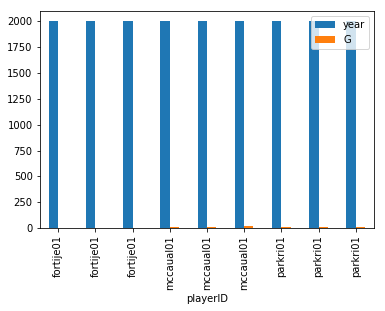

In [62]:
basic_df3.set_index("playerID").plot.bar();
#make no sense

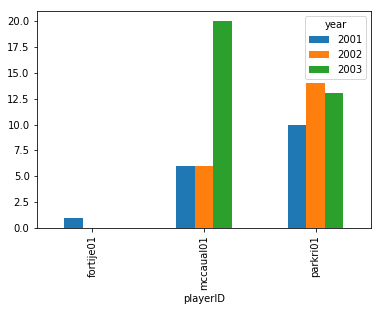

In [63]:
pivot.plot.bar()
#make more sense

#### df.reset_index() กลับไปใช้ชื่อ index เริ่มต้น

In [64]:
pivot=pivot.reset_index()
pivot.columns.name=None
pivot

,playerID,2001,2002,2003
0,fortije01,1.0,0.0,0.0
1,mccaual01,6.0,6.0,20.0
2,parkri01,10.0,14.0,13.0


In [65]:
pivot.melt()

,variable,value
0,playerID,fortije01
1,playerID,mccaual01
2,playerID,parkri01
3,2001,1
4,2001,6
5,2001,10
6,2002,0
7,2002,6
8,2002,14
9,2003,0


In [66]:
pivot.melt(id_vars="playerID")

,playerID,variable,value
0,fortije01,2001,1.0
1,mccaual01,2001,6.0
2,parkri01,2001,10.0
3,fortije01,2002,0.0
4,mccaual01,2002,6.0
5,parkri01,2002,14.0
6,fortije01,2003,0.0
7,mccaual01,2003,20.0
8,parkri01,2003,13.0


In [67]:
pivot.melt(id_vars="playerID",var_name="year",value_name="goals")

,playerID,year,goals
0,fortije01,2001,1.0
1,mccaual01,2001,6.0
2,parkri01,2001,10.0
3,fortije01,2002,0.0
4,mccaual01,2002,6.0
5,parkri01,2002,14.0
6,fortije01,2003,0.0
7,mccaual01,2003,20.0
8,parkri01,2003,13.0


In [68]:
pivot.melt(id_vars="playerID",value_vars=[2001,2002],var_name="year",value_name="goals")

,playerID,year,goals
0,fortije01,2001,1.0
1,mccaual01,2001,6.0
2,parkri01,2001,10.0
3,fortije01,2002,0.0
4,mccaual01,2002,6.0
5,parkri01,2002,14.0


In [69]:
larger_df3=df3[["playerID","tmID","year","G"]]
larger_df3

,playerID,tmID,year,G
7681,fortije01,WAS,2001,1.0
7682,fortije01,WAS,2002,0.0
7683,fortije01,WAS,2003,0.0
16400,mccaual01,TOR,2001,6.0
16401,mccaual01,TOR,2002,6.0
16403,mccaual01,SJS,2003,20.0
19579,parkri01,MIN,2001,10.0
19580,parkri01,MIN,2002,14.0
19581,parkri01,MIN,2003,13.0


In [71]:
try:
    larger_df3.pivot(index=["playerID","tmID"],columns="year",values="G")
except Exception as e:
    print(e)

Length of passed values is 9, index implies 2


In [72]:
larger_df3=df3[["playerID","year","G","A"]]
larger_df3

,playerID,year,G,A
7681,fortije01,2001,1.0,3.0
7682,fortije01,2002,0.0,1.0
7683,fortije01,2003,0.0,0.0
16400,mccaual01,2001,6.0,10.0
16401,mccaual01,2002,6.0,9.0
16403,mccaual01,2003,20.0,27.0
19579,parkri01,2001,10.0,15.0
19580,parkri01,2002,14.0,10.0
19581,parkri01,2003,13.0,12.0


In [73]:
test=larger_df3.pivot(index="playerID",columns="year",values=["G","A"])
test

G                 A            
year       2001  2002  2003  2001  2002  2003
playerID                                     
fortije01   1.0   0.0   0.0   3.0   1.0   0.0
mccaual01   6.0   6.0  20.0  10.0   9.0  27.0
parkri01   10.0  14.0  13.0  15.0  10.0  12.0

In [74]:
test.columns

MultiIndex(levels=[['G', 'A'], [2001, 2002, 2003]],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[None, 'year'])